In [1]:
# refer Teo's code to plot the comparison between the results of two detection models

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import path

In [11]:
from functools import reduce
import operator
def prod(factors):
    return reduce(operator.mul, factors, 1)

In [3]:
trial = 'DAP014(2)'

In [7]:
# new result:

new = trial[:6] + '.csv'

cough_new_dir = '../data/DAPHNE/pcmci_new'

path_new = path.join(cough_new_dir, new)

cough_probs = pd.read_csv(path_new)
sure_coughs = cough_probs[cough_probs.cough_prob > 0.99]
cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
cough_probs.set_index('timestamp', inplace=True)

In [10]:
# old result:

old = trial + '.csv'

cough_old_dir = '../data/DAPHNE/coughing'
path_old = path.join(cough_old_dir, old)

coughing = pd.read_csv(path_old)
sure_coughs = coughing[coughing.coughing > 0.99]

dap_data = pd.read_csv(f"../data/DAPHNE/respeck_AP/{trial}_respeck_raw.csv")
dap_data['timestamp'] = pd.to_datetime(dap_data['timestamp'])
dap_data.set_index('timestamp', inplace=True)

coughing['timestamp'] = pd.to_datetime(coughing['timestamp'])
coughing.set_index('timestamp', inplace=True)
resampled = dap_data.resample('1T').mean()[['breathingRate']]
resampled

,breathingRate
timestamp,
2019-06-04 05:17:00,20.644796
2019-06-04 05:18:00,26.785715
2019-06-04 05:19:00,28.410258
2019-06-04 05:20:00,26.136604
2019-06-04 05:21:00,15.369472
...,...
2019-06-06 05:42:00,15.697250
2019-06-06 05:43:00,NaN
2019-06-06 05:44:00,21.783601


In [12]:
cough_probs = cough_probs.resample('1T').agg(lambda x: 1-prod(1-x))
coughing = coughing.resample('1T').agg(lambda x: 1-prod(1-x))

In [13]:
joined = pd.merge(resampled, cough_probs, left_index=True, right_index=True)
joined = pd.merge(joined, coughing, left_index=True, right_index=True)

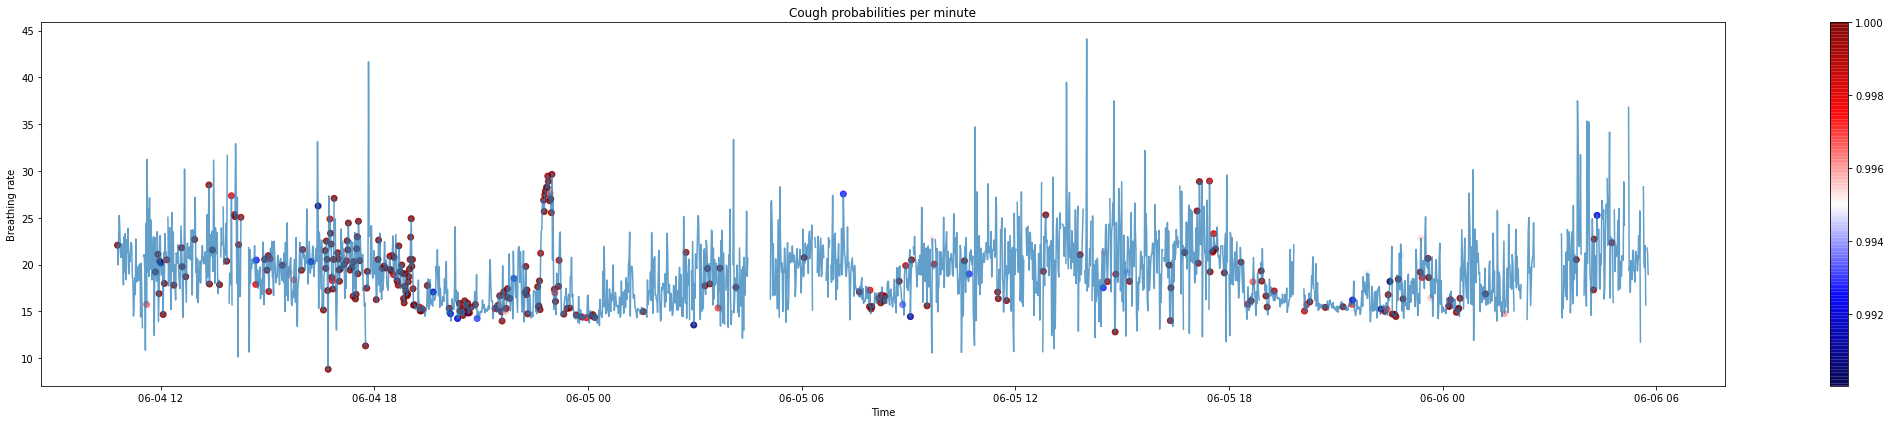

In [14]:
# new plot
sure_coughs = joined[joined.cough_prob > 0.99]

fig = plt.figure(figsize=(30, 6))
plt.plot(joined.index, joined.breathingRate, alpha=0.7)
plt.scatter(sure_coughs.index, sure_coughs.breathingRate, alpha = .8, c = sure_coughs.cough_prob, cmap = 'seismic')
cbar = plt.colorbar()

plt.title("Cough probabilities per minute")
plt.xlabel("Time")
plt.ylabel("Breathing rate")

plt.tight_layout()
plt.savefig("./cough_new014.png", dpi=300)

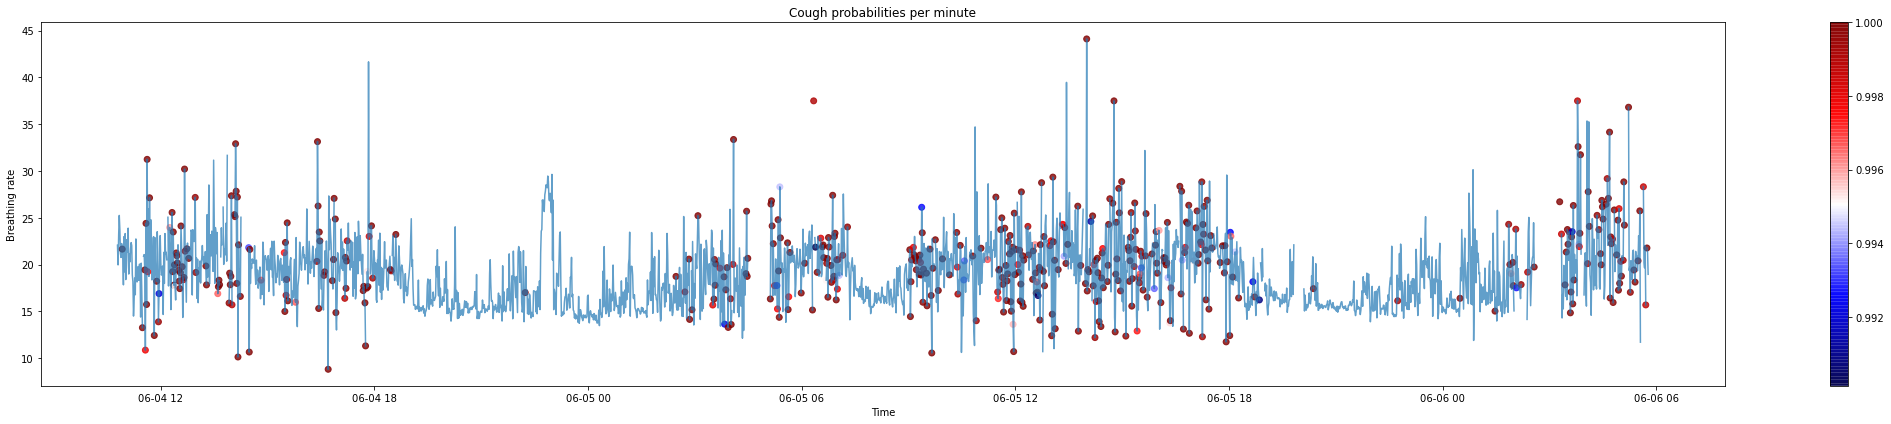

In [15]:
# old plot
sure_coughs = joined[joined.coughing > 0.99]

fig = plt.figure(figsize=(30, 6))
plt.plot(joined.index, joined.breathingRate, alpha=0.7)
plt.scatter(sure_coughs.index, sure_coughs.breathingRate, alpha = .8, c = sure_coughs.coughing, cmap = 'seismic')
cbar = plt.colorbar()

plt.title("Cough probabilities per minute")
plt.xlabel("Time")
plt.ylabel("Breathing rate")

plt.tight_layout()
plt.savefig("./cough_old014.png", dpi=300)